##Exercícios Preparação de Dados
Curso Introdução à Ciência de Dados - CTC/INE/UFSC

Prof. Jônata Tyska Carvalho

Prof. Mateus Grellert da Silva

*Exercícios adaptados a partir do material do prof. Vipin Kumar

### Briefing
Sua startup de análise de dados foi contratada por uma grande empresa de diagnóstico médico que quer construir um classificador para auxiliar os médicos a dignosticar câncer de mama. A ideia é construir o modelo com base em características de análises laboratoriais de amostras de células extraídas de pacientes com e sem câncer. Sua equipe foi encarregada de realizar algumas tarefas de preparação de dados no conjunto fornecido pela contratante.

#### **Carregando os dados** 

In [49]:
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

### **Exercício 0. Verificar a quantidade de instâncias e atributos** 

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code                  699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


### **Exercício 1. Descartar a coluna 'Sample Code'**

In [51]:
data.drop(columns='Sample code', inplace=True)
data

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


### **Exercício 2. Verificar valores faltantes por atributo** 


Já que nos resultados da questão 0 os atributos mostraram não ter valores NaN, vamos investigar mais a fundo cada atributo para encontrar possíveis valores indevidos.

In [52]:
# verificando os valores para cada atributo
for col in data.columns:
    print(f'{data[col].name}: {data[col].unique()}')

Clump Thickness: [ 5  3  6  4  8  1  2  7 10  9]
Uniformity of Cell Size: [ 1  4  8 10  2  3  7  5  6  9]
Uniformity of Cell Shape: [ 1  4  8 10  2  3  5  6  7  9]
Marginal Adhesion: [ 1  5  3  8 10  4  6  2  9  7]
Single Epithelial Cell Size: [ 2  7  3  1  6  4  5  8 10  9]
Bare Nuclei: ['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
Bland Chromatin: [ 3  9  1  2  4  5  7  8  6 10]
Normal Nucleoli: [ 1  2  7  4  5  3 10  6  9  8]
Mitoses: [ 1  5  4  2  3  7 10  8  6]
Class: [2 4]


O atributo `Bare Nuclei` apresenta um valor inválido *'?'* e será tratado para remoção desse valor indevido.

### **Exercício 3. Imputar os valores faltantes com a mediana do atributo** 

In [53]:
# substituindo os valores indevidos por valores NaN
data.replace('?', pd.NA, inplace=True)

# convertendo o tipo do atributo para numérico para poder calcular a mediana
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei'])
# inputando os valores faltantes com a mediana
data['Bare Nuclei'] = data['Bare Nuclei'].fillna(data['Bare Nuclei'].median())
data = data.astype(int)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              699 non-null    int32
 1   Uniformity of Cell Size      699 non-null    int32
 2   Uniformity of Cell Shape     699 non-null    int32
 3   Marginal Adhesion            699 non-null    int32
 4   Single Epithelial Cell Size  699 non-null    int32
 5   Bare Nuclei                  699 non-null    int32
 6   Bland Chromatin              699 non-null    int32
 7   Normal Nucleoli              699 non-null    int32
 8   Mitoses                      699 non-null    int32
 9   Class                        699 non-null    int32
dtypes: int32(10)
memory usage: 27.4 KB


In [54]:
# inspecionando novamente os dados, após imputação
for col in data.columns:
    print(f'{data[col].name}: {data[col].unique()}')

Clump Thickness: [ 5  3  6  4  8  1  2  7 10  9]
Uniformity of Cell Size: [ 1  4  8 10  2  3  7  5  6  9]
Uniformity of Cell Shape: [ 1  4  8 10  2  3  5  6  7  9]
Marginal Adhesion: [ 1  5  3  8 10  4  6  2  9  7]
Single Epithelial Cell Size: [ 2  7  3  1  6  4  5  8 10  9]
Bare Nuclei: [ 1 10  2  4  3  9  7  5  8  6]
Bland Chromatin: [ 3  9  1  2  4  5  7  8  6 10]
Normal Nucleoli: [ 1  2  7  4  5  3 10  6  9  8]
Mitoses: [ 1  5  4  2  3  7 10  8  6]
Class: [2 4]


### **Exercício 4. Recarregue os dados originais (com valores faltantes) e ao invés de imputar valores, descarte as instâncias com valores faltantes** 

In [55]:
#recarregando os dados do dataset, desta vez já indicando o valor ('?') que representa os valores faltantes
data2 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', 
    header=None, na_values='?')

#continuando na progressão anterior até a remoção dos dados registros com dados faltantes
data2.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

data2.drop(columns='Sample code', inplace=True)

# método DataFrame.dropna() remove os registros que apresentam valores faltantes
data2.dropna(inplace=True)
# convertendo os tipos dos atributos para a melhor correspondência possível
data2 = data2.convert_dtypes()

data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    Int64
 1   Uniformity of Cell Size      683 non-null    Int64
 2   Uniformity of Cell Shape     683 non-null    Int64
 3   Marginal Adhesion            683 non-null    Int64
 4   Single Epithelial Cell Size  683 non-null    Int64
 5   Bare Nuclei                  683 non-null    Int64
 6   Bland Chromatin              683 non-null    Int64
 7   Normal Nucleoli              683 non-null    Int64
 8   Mitoses                      683 non-null    Int64
 9   Class                        683 non-null    Int64
dtypes: Int64(10)
memory usage: 65.4 KB


### **Exercício 5. Identificar os atributos do conjunto de dados que possuem outliers**

In [56]:
# conferindo a sumarização estatística dos dados para encontrar os indícios de outliers
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump Thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
Bland Chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


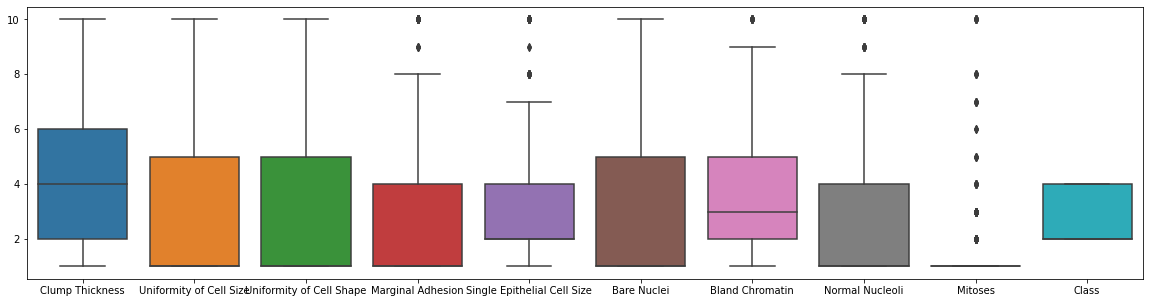

In [57]:
# visualizando os dados com boxplot para verificar possíveis outliers
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(20,5))
fig = sns.boxplot(data=data)


### **Exercício 6. Remover do conjunto de dados instâncias que possuam outliers em algum de seus atributos (dica: usar o z-score para defininir o que são outliers z > 3 ou z < -3)** 

In [58]:
# limitamos as operações à colunas identificadas visualmente na questão anterior
outlier_cols = ['Marginal Adhesion', 'Single Epithelial Cell Size',
                 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']

# percorrendo as colunas indicadas à procura de outliers segundo critério proposto
for col in outlier_cols:
    outlier = []

    for i in data[col]:
        z = (i - data[col].mean()) / data[col].std()
        # "z < -3" ignorado porque já verificamos visualmente que não ocorre
        if z > 3:
            outlier.append(i)
    print(f'Outlier na coluna {col}: {set(outlier)}') # set() usado para os registros únicos


Outlier na coluna Marginal Adhesion: set()
Outlier na coluna Single Epithelial Cell Size: {10}
Outlier na coluna Bland Chromatin: set()
Outlier na coluna Normal Nucleoli: set()
Outlier na coluna Mitoses: {8, 10, 7}


Os resultados mostram que o critério do boxplot considera valores com z score menor que 3 para a definição de outliers (no caso 2,5), e por isso apenas dois atributos tiveram ocorrências confirmadas. Nos casos negativos de ocorrência, os resultados trazem conjuntos vazios.

### **Exercício 7. Verificar a quantidade de registros duplicados no dataset**

In [59]:
# o método df.duplicated() retorna os registros duplicados

print(f' Número de registros duplicados no dataset: {data[data.duplicated()].shape[0]}')


 Número de registros duplicados no dataset: 242


### **Exercício 8. Descartar as instâncias duplicadas do conjunto de dados**

In [60]:
# atribui ao novo dataframe o retorno dos dados sem duplicatas
data_no_dupe = data.drop_duplicates()

In [61]:
# conferindo as dimensões do dataframe após a operação
data_no_dupe.shape

(457, 10)

### **Exercício 9. Discretizar os valores do atributo 'Clump Thickness' em 4 intervalos de igual tamanho**

In [62]:
n_intervals = 4
intervals_size = (data['Clump Thickness'].max() - data['Clump Thickness'].min()) / n_intervals

# encontrando os limites dos intervalos por list comprehension
equal_intervals = [data['Clump Thickness'].min() + intervals_size * N \
    for N in range(1,n_intervals+1)]

equal_intervals = [0] + equal_intervals # adicionando limite inferior à lista para uso do pd.cut

# solução criando novo atributo discretizado
data['Equal Intervals'] = pd.cut(data['Clump Thickness'], bins=equal_intervals, labels=['1','2','3','4'])

# solução substituindo os valores do próprio atributo
#data_q9 = data.copy()
#data_q9['Clump Thickness'] = pd.cut(data_q9['Clump Thickness'], bins=equal_intervals, labels=['1','2','3','4'])



In [63]:
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Equal Intervals
0,5,1,1,1,2,1,3,1,1,2,2
1,5,4,4,5,7,10,3,2,1,2,2
2,3,1,1,1,2,2,3,1,1,2,1
3,6,8,8,1,3,4,3,7,1,2,3
4,4,1,1,3,2,1,3,1,1,2,2


### **Exercício 10. Discretizar os valores do atributo 'Clump Thickness' em 4 intervalos de igual frequência** 

In [64]:
# solução usando pd.cut:
# encontrando os valores para os quartis
quartiles = data['Clump Thickness'].quantile([0.25, 0.5, 0.75, 1]).tolist()

quartiles = [0] + quartiles # adicionando limite inferior à lista para uso do pd.cut

# solução criando novo atributo discretizado
data['Equal Frequencies'] = pd.cut(data['Clump Thickness'], bins=quartiles, labels=['1','2','3','4'])

# solução substituindo os valores do próprio atributo
#data_q10 = data.copy()
#data_q10['Clump Thickness'] = pd.cut(data_q10['Clump Thickness'], bins=quartiles, labels=['1','2','3','4'])

In [65]:
data.head()
#data_q10.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Equal Intervals,Equal Frequencies
0,5,1,1,1,2,1,3,1,1,2,2,3
1,5,4,4,5,7,10,3,2,1,2,2,3
2,3,1,1,1,2,2,3,1,1,2,1,2
3,6,8,8,1,3,4,3,7,1,2,3,3
4,4,1,1,3,2,1,3,1,1,2,2,2


In [66]:
# solução usando pd.qcut:
# criando novo atributo discretizado
data['Equal Frequencies'] = pd.qcut(data['Clump Thickness'], q=4, labels=['1','2','3','4'] )

# solução substituindo os valores do próprio atributo
#data_q10 = data.copy()
#data['Equal Frequencies'] = pd.qcut(data['Clump Thickness'], q=4, labels=['1','2','3','4'] )


In [67]:
data.head()
#data_q10.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Equal Intervals,Equal Frequencies
0,5,1,1,1,2,1,3,1,1,2,2,3
1,5,4,4,5,7,10,3,2,1,2,2,3
2,3,1,1,1,2,2,3,1,1,2,1,2
3,6,8,8,1,3,4,3,7,1,2,3,3
4,4,1,1,3,2,1,3,1,1,2,2,2


Vale a pena ressaltar que por se tratarem de muitos registros, com valores inteiros variando num pequeno intervalo, a discretização de igual frquência não conseguiu dividir os intervalos com um número exato de registros para cada grupo, visto que o critério de separação ainda depende de um valor na distribuição. A única maneira de dividir em grupos de frequência "exatamente" iguais seria iterar sobre o conjunto de dados, atribuindo os valores discretizados aos registros, ao passo que os grupos fossem ocupados, mas essa alternativa é inconsistente, porque traria valores discretizados diferentes para registros de valores de interesse iguais.

In [68]:
# a contagem de elementos nos intervalos:
data['Equal Frequencies'].value_counts()

1    195
2    188
3    164
4    152
Name: Equal Frequencies, dtype: int64